In [ ]:
هimport os
os.environ['KAGGLE_USERNAME'] = 'thedesertm'
os.environ['KAGGLE_KEY'] = '08da85d8244fde4552d51ab1f013319c'

In [ ]:
! kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip /content/brain-mri-images-for-brain-tumor-detection.zip

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
replace brain_tumor_dataset/no/1 no.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
yes_data = []
no_data = []
paths = []
labels = []
import os
for dirname, _, filenames in os.walk(r'/content/brain_tumor_dataset/yes'):
    for filename in filenames:
        if '.jpg' in filename:
            paths.append(os.path.join(dirname, filename))

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])
for path in paths:
    image = Image.open(path)
    image = image.resize((128,128))
    image= np.array(image)
    if image.shape == (128,128,3):
        yes_data.append(np.array(image))
        labels.append(encoder.transform([[0]]).toarray())
labels[0]

array([[1., 0.]])

In [ ]:
more_paths = []
for dirname, _, filenames in os.walk(r'/content/brain_tumor_dataset/no'):
    for filename in filenames:
        if '.jpg' in filename:
            more_paths.append(os.path.join(dirname, filename))

In [ ]:
for path in more_paths:
    image = Image.open(path)
    image = image.resize((128,128))
    image = np.array(image)
    if image.shape == (128,128,3):
        yes_data.append(np.array(image))
        labels.append(encoder.transform([[1]]).toarray())

In [ ]:
yes_data = np.array(yes_data)
yes_data.shape

(139, 128, 128, 3)

In [ ]:
labels = np.array(labels)
labels = labels.reshape(139,2)
labels.shape

(139, 2)

[[[ 4  4  4]
  [15 15 15]
  [12 12 12]
  ...
  [12 12 12]
  [12 12 12]
  [12 12 12]]

 [[ 4  4  4]
  [15 15 15]
  [12 12 12]
  ...
  [12 12 12]
  [12 12 12]
  [12 12 12]]

 [[ 4  4  4]
  [15 15 15]
  [12 12 12]
  ...
  [12 12 12]
  [12 12 12]
  [12 12 12]]

 ...

 [[ 4  4  4]
  [14 14 14]
  [12 12 12]
  ...
  [12 12 12]
  [12 12 12]
  [12 12 12]]

 [[ 6  6  6]
  [10 10 10]
  [14 14 14]
  ...
  [12 12 12]
  [12 12 12]
  [12 12 12]]

 [[ 6  6  6]
  [ 9  9  9]
  [14 14 14]
  ...
  [12 12 12]
  [12 12 12]
  [12 12 12]]]
[1. 0.]


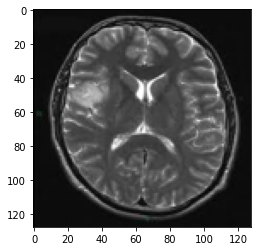

In [ ]:
np.set_printoptions(linewidth = 200)
plt.imshow(yes_data[0])
print(yes_data[0])
print(labels[0])

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(yes_data, labels, random_state = 3, shuffle = True)

In [ ]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((104, 128, 128, 3), (35, 128, 128, 3), (104, 2), (35, 2))

In [ ]:
train_data = train_data /255.0
test_data = test_data/255.0

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
input = Input(shape = (128,128,3))
x = Conv2D(16, (3,3), activation = 'relu')(input)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(32, (3,3), activation = 'relu')(x)
x = MaxPooling2D(2,2)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(124, activation = 'relu')(x)
x = Dropout(0.27)(x)
x = Dense(124, activation = 'relu')(x)
output = Dense(2, activation = 'softmax')(x)
model = Model(inputs = input, outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0     

In [ ]:
from tensorflow.keras.optimizers import RMSprop,Adam


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(lr = 0.001), metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8*10**(epoch / 20))

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
en = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
mc = ModelCheckpoint(monitor='val_loss', filepath='best_model.hdf5',verbose=1, save_best_only=True)
history = model.fit(train_data, train_labels, epochs = 75, callbacks = [lr_schedule,en,mc],validation_data = (test_data, test_labels))

Epoch 1/75
4/4 [==============================] - ETA: 0s - loss: 1.5690 - accuracy: 0.5096
Epoch 00001: val_loss improved from inf to 0.73003, saving model to best_model.hdf5
4/4 [==============================] - 3s 543ms/step - loss: 1.5690 - accuracy: 0.5096 - val_loss: 0.7300 - val_accuracy: 0.4857 - lr: 1.0000e-08
Epoch 2/75
4/4 [==============================] - ETA: 0s - loss: 1.5462 - accuracy: 0.5096
Epoch 00002: val_loss improved from 0.73003 to 0.72567, saving model to best_model.hdf5
4/4 [==============================] - 2s 461ms/step - loss: 1.5462 - accuracy: 0.5096 - val_loss: 0.7257 - val_accuracy: 0.4857 - lr: 1.1220e-08
Epoch 3/75
4/4 [==============================] - ETA: 0s - loss: 1.5390 - accuracy: 0.4904
Epoch 00003: val_loss improved from 0.72567 to 0.71835, saving model to best_model.hdf5
4/4 [==============================] - 2s 457ms/step - loss: 1.5390 - accuracy: 0.4904 - val_loss: 0.7184 - val_accuracy: 0.4857 - lr: 1.2589e-08
Epoch 4/75
4/4 [==========

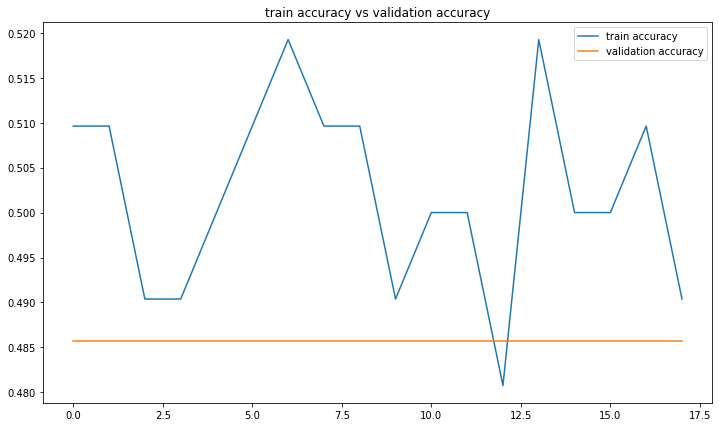

In [ ]:
plt.figure(figsize = (12,7))
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title("train accuracy vs validation accuracy")
plt.legend()
plt.show()


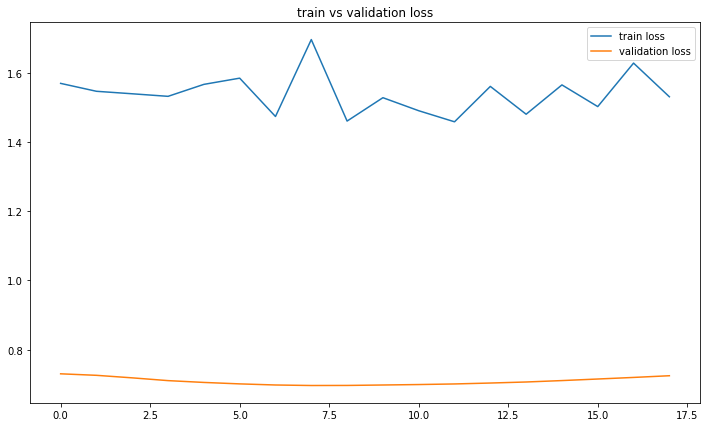

In [ ]:
plt.figure(figsize = (12,7))

plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.title("train vs validation loss")
plt.show()


In [ ]:
def tumor(number):
    if number == 0:
        return "Not a tumor"
    else:
        return "a tumor"

100.0% Confidence This Is a tumor


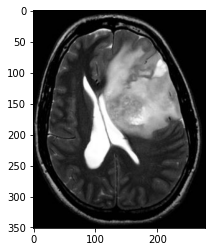

In [ ]:
img = Image.open(r"/content/yes/Y244.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1, 128, 128, 3)
result = model.predict([x])
classification = np.where(result == np.amax(result))[1][0]
print(str(result[0][classification]*100) + '% Confidence This Is ' + tumor(classification))
plt.imshow(img)

[0.0, 1.0]
100.0% Confidence This Is Not a tumor


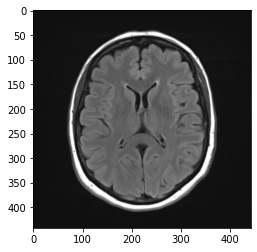

In [ ]:
img2 = Image.open(r"/content/no/no 97.jpg")
y = np.array(img2.resize((128,128)))
y = y.reshape(1, 128, 128, 3)
result2 = model.predict([y])
ind = 0
classification2 = 0
import numpy as np
for result in result2:
    result = result.tolist()
    print(result)
    if result[0] > result[1]:
        classification = 1
        ind = 0
    else:
        classification = 0
        ind = 1
#classification2 = np.where(result2 == np.amax(result2))[1][0]
print(str(result2[0][ind]*100) + '% Confidence This Is ' + tumor(classification2))
plt.imshow(img2)